# EDA of kickstarter projects

## 1. First Look

In [3]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv("data/kickstarter_projects.csv") #from https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects/data
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [5]:
df.describe().round(0)

,ID,Goal,Pledged,Backers
count,3.748530e+05,374853.0,374853.0,374853.0
mean,1.074656e+09,45864.0,9121.0,107.0
std,6.191377e+08,1158778.0,91321.0,912.0
min,5.971000e+03,0.0,0.0,0.0
25%,5.380728e+08,2000.0,31.0,2.0
50%,1.075300e+09,5500.0,625.0,12.0
75%,1.610149e+09,16000.0,4051.0,57.0
max,2.147476e+09,166361391.0,20338986.0,219382.0


In [6]:
#Check for missing values
df.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().value_counts()

False    374853
Name: count, dtype: int64

## 2. Check Variables

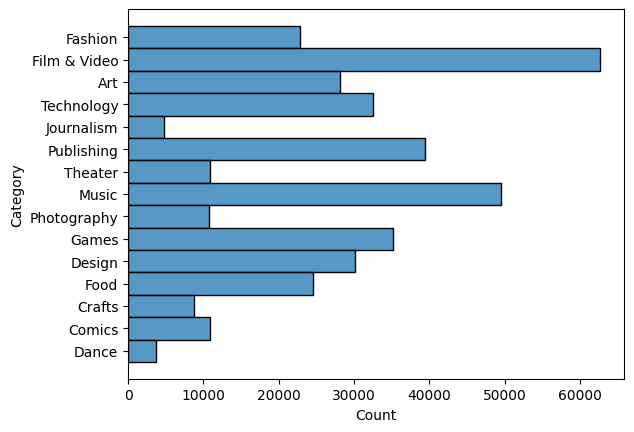

In [8]:
ax = sns.histplot(df, y='Category');

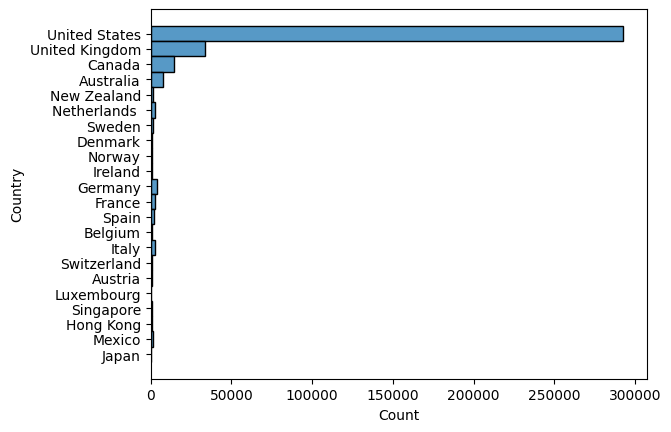

In [9]:
ax = sns.histplot(df, y='Country');

In [45]:
#deeper look on country due to imbalance in data set and its potential implications on model
country_stats_pledged = df.groupby('Country').agg(count=('Pledged','size'), mean=('Pledged','mean'), median=('Pledged','median'), max=('Pledged','max'))
country_stats_pledged.astype('int').sort_values(by='count', ascending=False)

,count,mean,median,max
Country,,,,
United States,292618,9670,725,20338986
United Kingdom,33671,7026,506,5494493
Canada,14756,6220,303,2500534
Australia,7839,5962,222,1121309
Germany,4171,9536,286,1069748
France,2939,11690,541,1764897
Italy,2878,5693,112,1059078
Netherlands,2868,10197,165,5020667
Spain,2276,5688,157,502622


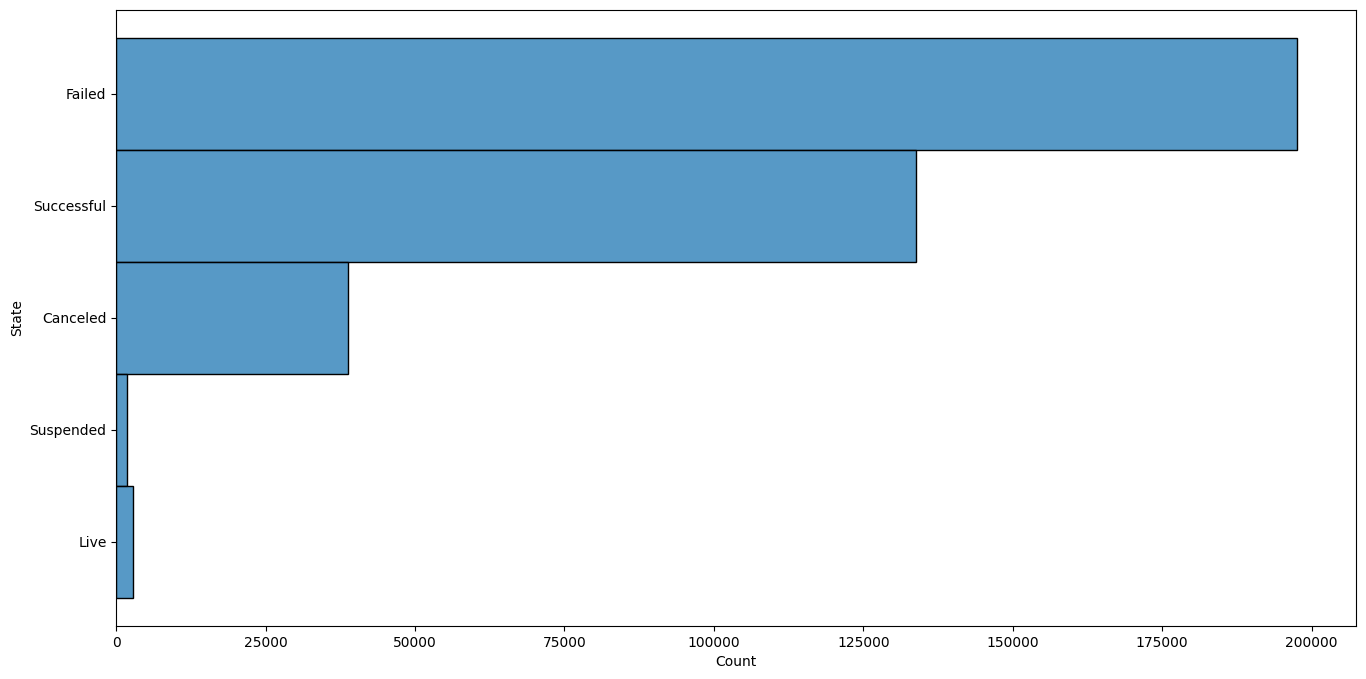

In [58]:
fig = plt.figure(figsize=(16, 8))
sns.histplot(df, y='State');

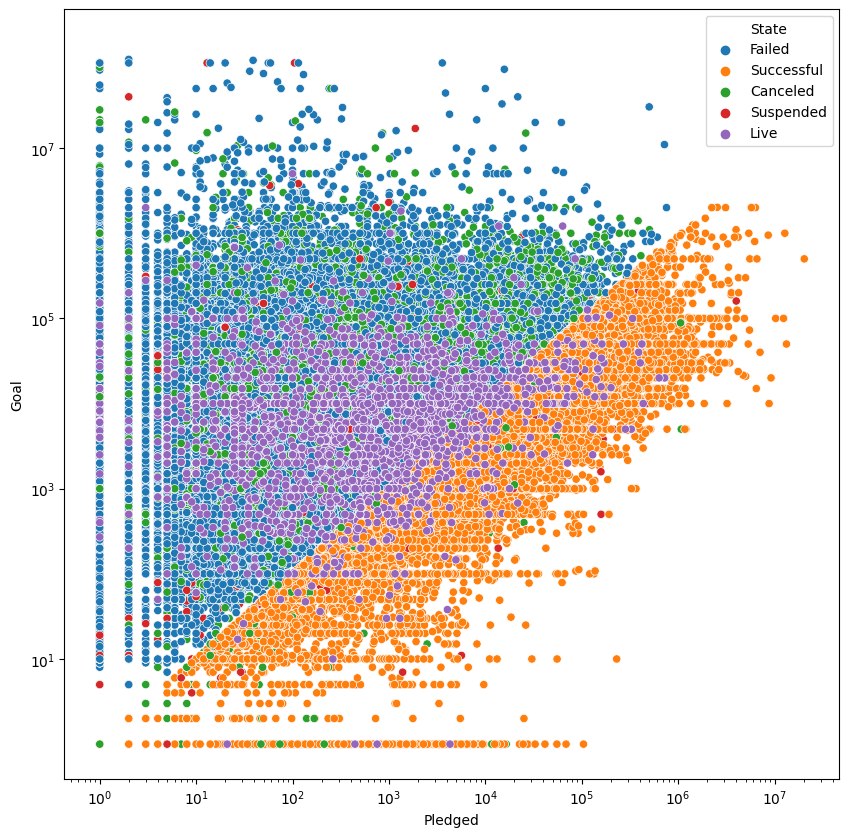

In [57]:
# Create scatterplot with log-scaled x-axis and y-axis
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x="Pledged", y="Goal", data=df, hue='State')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
sns.histplot(df,)

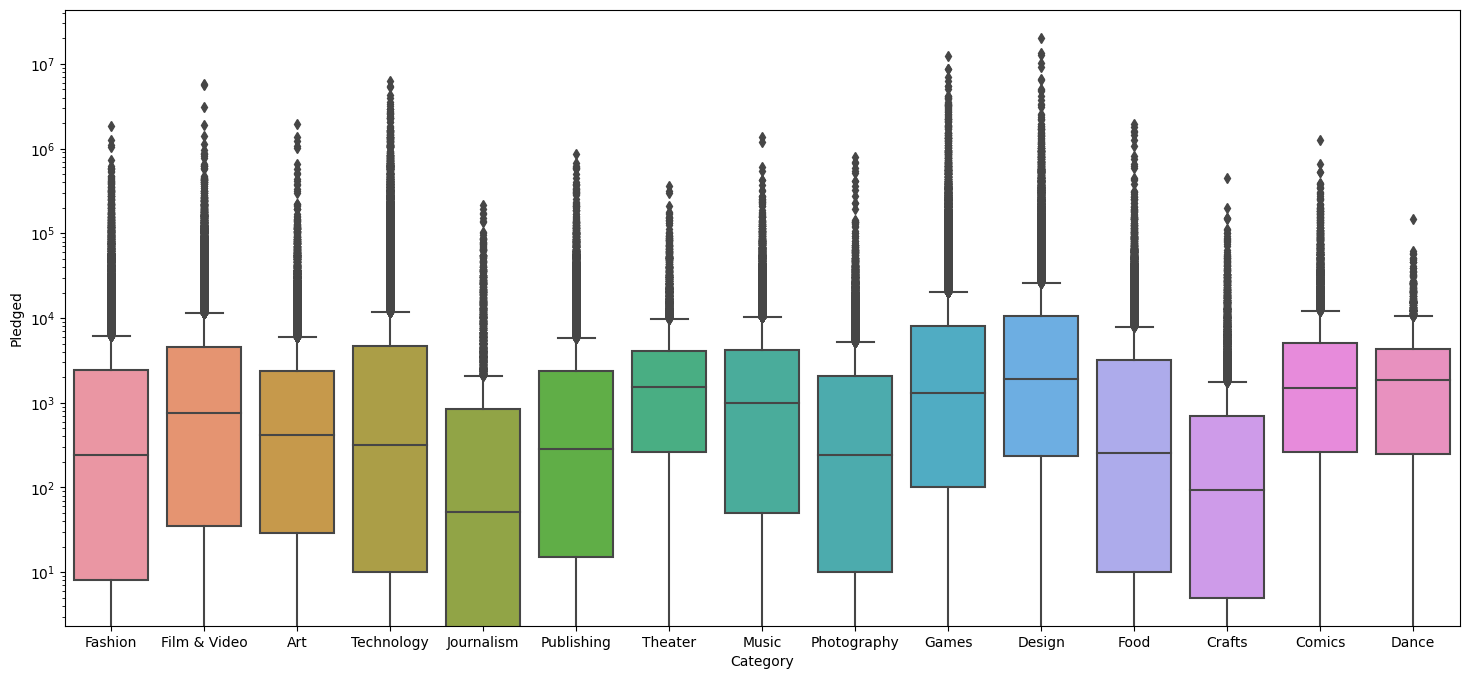

In [47]:
#check for summary statistics
fig = plt.figure(figsize=(18, 8))
sns.boxplot(data=df, y='Pledged', x='Category');
plt.yscale('log')
plt.show()

In [15]:
df.groupby('State')['Goal'].describe().style.format("{:.0f}")

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Canceled,38751,75624,1281851,0,3292,10000,30000,100000000
Failed,197611,63189,1436066,0,2500,7500,20000,166361391
Live,2798,62549,1875803,1,2049,6524,18469,99000000
Successful,133851,9536,27967,0,1300,3840,10000,2015609
Suspended,1842,175571,3448279,1,1000,5000,20000,100000000


In [17]:
df.groupby('Category')['Pledged'].describe().style.format("{:.0f}")

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Art,28151,3221,21856,0,29,422,2392,1924018
Comics,10819,6610,24409,0,260,1489,5038,1254120
Crafts,8809,1633,8087,0,5,94,707,454718
Dance,3767,3454,5769,0,252,1840,4368,146076
Design,30065,24421,214995,0,238,1923,10615,20338986
Fashion,22812,5713,29933,0,8,243,2448,1851033
Film & Video,62694,6218,41687,0,35,751,4591,5764229
Food,24599,5114,31222,0,10,255,3180,1927217
Games,35225,21044,168544,0,101,1289,8077,12393140


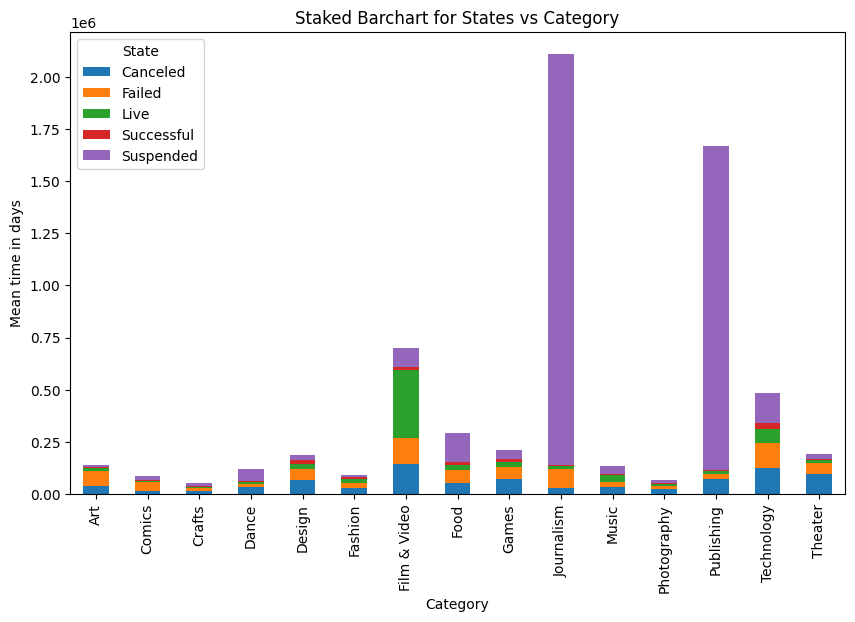

In [19]:
mean_goal = df.groupby(['Category', 'State'])['Goal'].mean().reset_index()

# create a pivot table to prepare the data for plotting
pivot_table = mean_goal.pivot(index='Category', columns='State', values='Goal')

# plot the stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the x-axis label
ax.set_xlabel('Category')

# set the y-axis label
ax.set_ylabel('Mean time in days')

# set the chart title
ax.set_title('Staked Barchart for States vs Category')

# show the chart
plt.show()

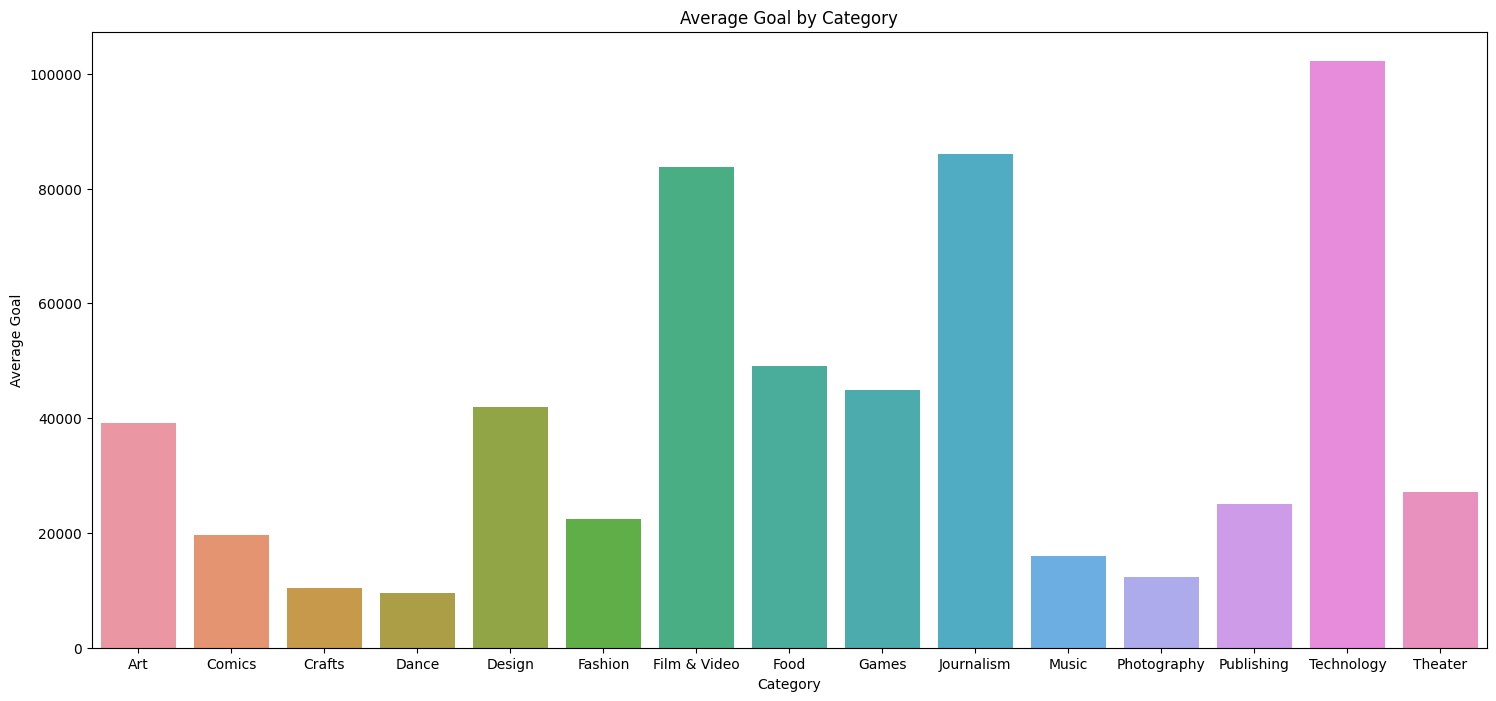

In [20]:
avg_goal_by_category = df.groupby('Category')['Goal'].mean().reset_index()
fig = plt.figure(figsize=(18, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Goal', data=avg_goal_by_category)

# Set the title and axis labels
plt.title('Average Goal by Category')
plt.xlabel('Category')
plt.ylabel('Average Goal')

# Show the plot
plt.show()

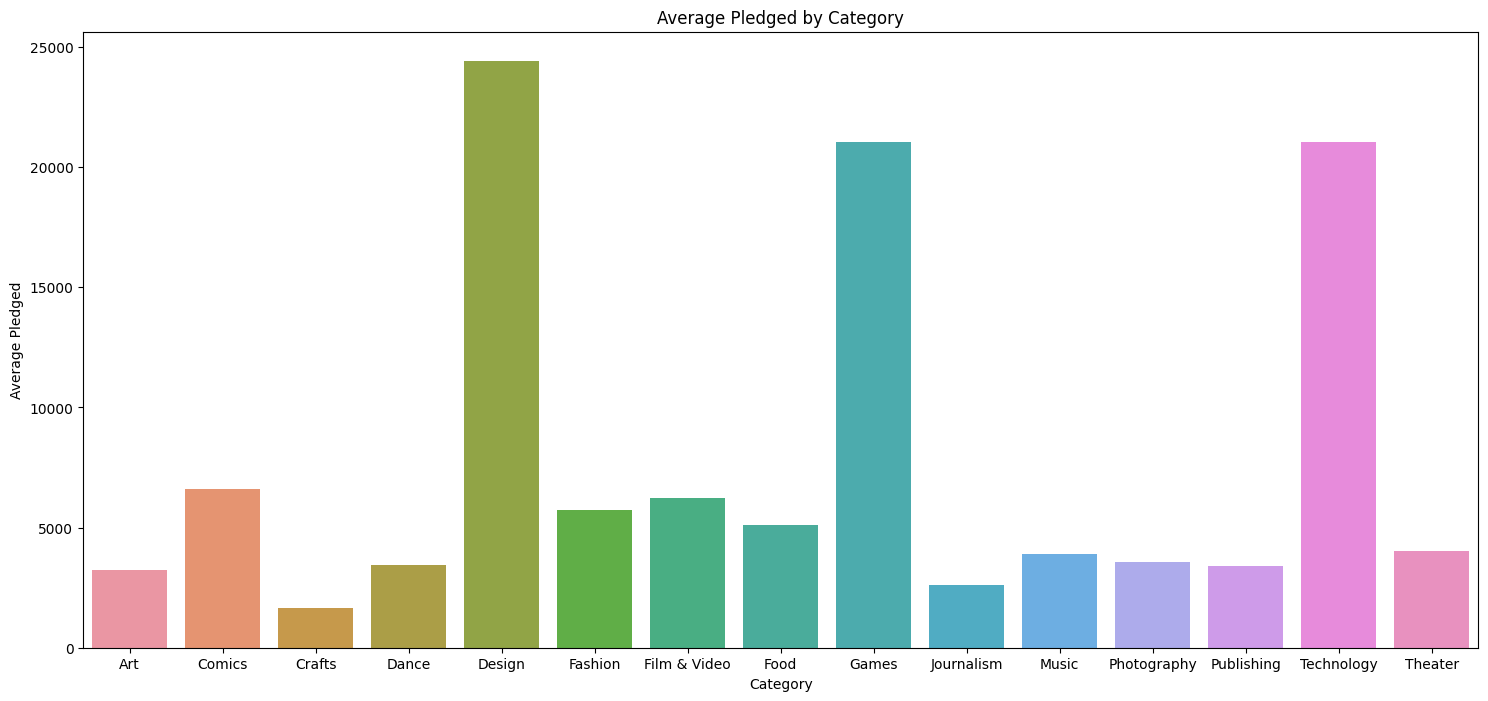

In [24]:
avg_pledged_by_category = df.groupby('Category')['Pledged'].mean().reset_index()
fig = plt.figure(figsize=(18, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Pledged', data=avg_pledged_by_category)

# Set the title and axis labels
plt.title('Average Pledged by Category')
plt.xlabel('Category')
plt.ylabel('Average Pledged')

# Show the plot
plt.show()

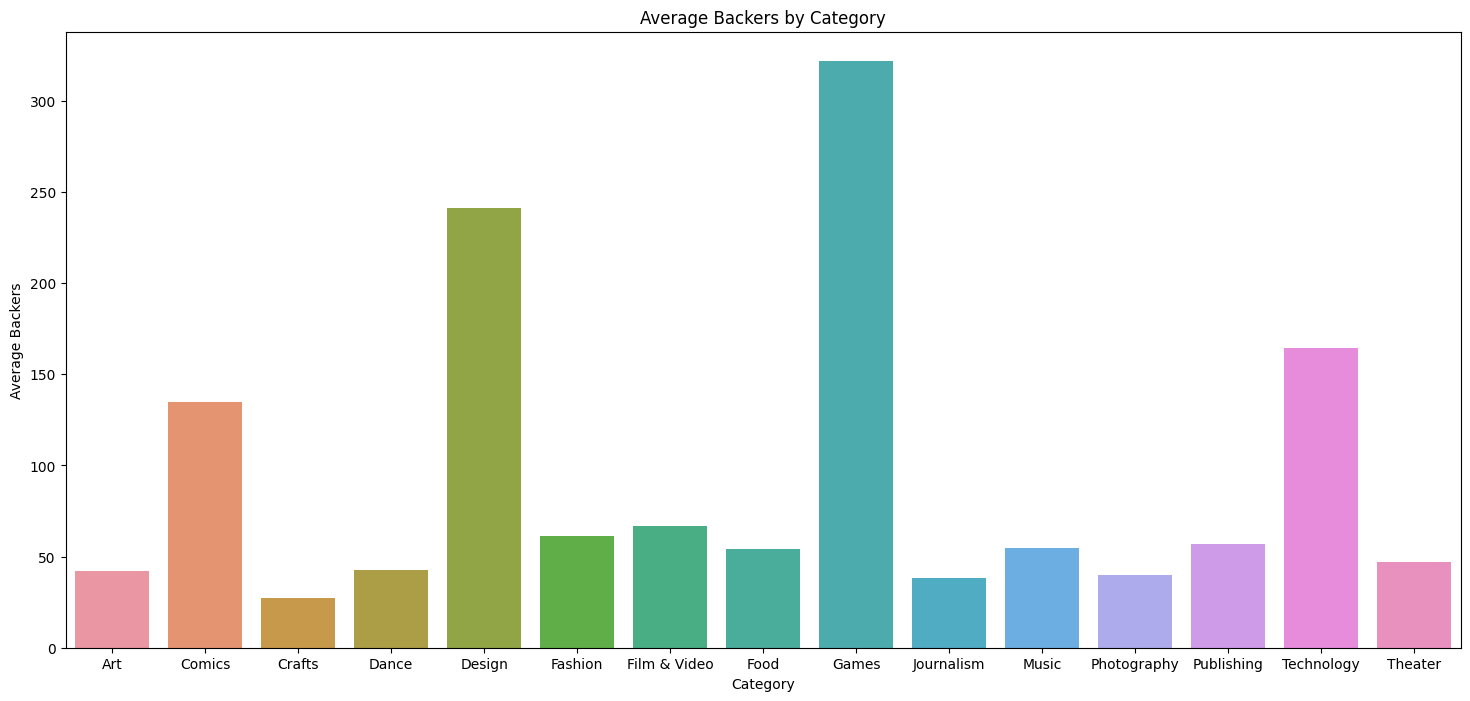

In [25]:
avg_backers_by_category = df.groupby('Category')['Backers'].mean().reset_index()
fig = plt.figure(figsize=(18, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Backers', data=avg_backers_by_category)

# Set the title and axis labels
plt.title('Average Backers by Category')
plt.xlabel('Category')
plt.ylabel('Average Backers')

# Show the plot
plt.show()